# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from datetime import datetime, timedelta

# Importing Data

In [2]:
with open('new_clean_data.pkl', 'rb') as file:
    df = pickle.load(file)

In [3]:
# adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,video_id,channel_id,title,description,tags,caption,licensed_content,view_count,like_count,comment_count,channel_name,subscribers,total_views,total_videos,playlist_id,category,duration_formatted,published_at_formatted,no_of_tags,title_length,description_length
0,3fqTNzXY5tg,UCvZnwzmc3m1Eush-Or8Z6DA,Using Code and GPT-3 to Learn Faster,Thanks to ProjectPro.io for their support: htt...,[],True,True,6871,184,23,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:18:06,2023-02-19 14:00:02,0,36,795
1,bgVu5WVR9SE,UCvZnwzmc3m1Eush-Or8Z6DA,Data Analyst MENTORSHIP - Q&A (while I drink ...,⬇️⬇️⬇️Check here prior to asking your question...,[],True,True,3723,184,9,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:29:22,2022-11-04 03:32:38,0,53,1475
2,4we3smhjAB8,UCvZnwzmc3m1Eush-Or8Z6DA,How Data Science ACTUALLY Works,Check out Deepnote for the easiest way to prac...,[],True,True,85152,2647,136,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:26:50,2022-11-01 16:30:09,0,31,1205
3,lpF5SSgczeE,UCvZnwzmc3m1Eush-Or8Z6DA,Does Instagram think you live in an influentia...,Request this and many other datasets @: https:...,[],True,True,4470,158,12,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 01:24:08,2022-10-25 14:00:07,0,81,1059
4,cRVM-LTe3fI,UCvZnwzmc3m1Eush-Or8Z6DA,Data Analyst MENTORSHIP - Q&A (while I drink ...,⬇️⬇️⬇️Check here prior to asking your question...,[],True,True,3078,104,4,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:26:55,2022-10-07 03:36:26,0,53,1475


# EDA

In [5]:
# create time delta to check videos posted in last 30days
now = datetime.now()

one_month_ago = now - timedelta(days=30)

one_month_ago

datetime.datetime(2023, 11, 20, 15, 43, 29, 626091)

In [6]:
# create df of videos a month old
df_one_month_ago = df[df['published_at_formatted'] >= one_month_ago]

In [7]:
# create df of videos only a minute long
min_vid_time = timedelta(seconds=60)

df_oneminvid = df[df['duration_formatted'] <= min_vid_time]

In [8]:
df.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,9322.00,9322.00,9322.00,9322.00,9322.00,9322.00,9322,9322.00,9322.00,9322.00
mean,41207.70,950.78,54.35,448648.02,37438378.55,1079.89,0 days 00:31:00.894121433,12.26,62.53,2109.46
std,161115.87,3091.49,162.94,346890.26,31298157.33,721.74,0 days 00:57:43.756530145,8.71,21.65,1204.35
min,0.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:00:00,0.00,4.00,0.00
25%,1811.50,38.00,2.00,155000.00,8740951.00,303.00,0 days 00:04:11,5.00,46.00,1114.25
50%,6974.50,177.50,12.00,255000.00,22950468.00,1532.00,0 days 00:10:59,11.00,60.00,2093.00
75%,24418.25,638.00,47.00,809000.00,63094287.00,1758.00,0 days 00:40:55.500000,20.00,81.00,2921.00
max,7615207.00,65474.00,4269.00,1060000.00,86329667.00,1857.00,0 days 11:59:53,44.00,109.00,5000.00


In [9]:
df_one_month_ago.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,147.00,147.00,147.00,147.00,147.00,147.00,147,147.00,147.00,147.00
mean,10241.54,402.98,17.86,258608.84,21407602.65,801.48,0 days 00:20:37.272108843,7.67,64.25,1154.63
std,17957.45,683.65,26.91,295311.69,26585331.26,632.28,0 days 00:35:42.114512108,7.89,21.28,1034.03
min,0.00,0.00,0.00,29300.00,1588707.00,58.00,0 days 00:00:00,0.00,20.00,0.00
25%,347.00,12.00,1.00,61900.00,4258081.00,278.00,0 days 00:00:56,0.00,48.00,91.00
50%,2778.00,150.00,6.00,106000.00,5737808.00,576.00,0 days 00:06:49,6.00,65.00,1053.00
75%,11576.00,495.00,24.50,211000.00,22950468.00,1532.00,0 days 00:29:03.500000,9.00,81.00,1915.00
max,125592.00,5051.00,131.00,1060000.00,86329667.00,1857.00,0 days 04:34:24,38.00,100.00,4434.00


In [10]:
df_oneminvid.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,818.00,818.00,818.00,818.00,818.00,818.00,818,818.00,818.00,818.00
mean,44427.59,777.40,17.46,246577.02,17595233.87,572.31,0 days 00:00:39.367970660,10.76,50.05,1253.12
std,314251.60,1839.45,28.06,259381.01,21575692.28,521.90,0 days 00:00:16.154935311,9.59,18.86,1027.15
min,0.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:00:00,0.00,8.00,0.00
25%,2623.75,82.00,3.00,61900.00,4258081.00,286.00,0 days 00:00:28,0.00,37.00,231.00
50%,7963.00,293.50,8.50,185000.00,9376789.00,308.00,0 days 00:00:42,8.00,47.00,1420.00
75%,16805.00,718.75,20.00,220000.00,14481229.00,576.00,0 days 00:00:54,20.00,59.00,1948.00
max,7615207.00,23776.00,251.00,1060000.00,86329667.00,1857.00,0 days 00:01:00,33.00,100.00,3764.00


In [11]:
# drop videos upto a minute in duration, as youtube shorts are 60seconds, these videos have a large std, and include advertisement videos

df.drop(df[df['duration_formatted'] <= min_vid_time].index, inplace=True)

In [12]:
df.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,8504.00,8504.00,8504.00,8504.00,8504.00,8504.00,8504,8504.0,8504.00,8504.00
mean,40897.98,967.45,57.90,468085.23,39347091.20,1128.72,0 days 00:33:56.106773283,12.4,63.73,2191.83
std,137716.37,3185.67,169.95,348049.79,31425469.48,719.50,0 days 00:59:37.970832538,8.6,21.52,1187.98
min,4.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:01:01,0.0,4.00,0.00
25%,1748.25,35.00,2.00,155000.00,8740951.00,303.00,0 days 00:05:15,5.0,47.00,1226.75
50%,6837.50,167.00,12.00,256000.00,22950468.00,1532.00,0 days 00:12:55,11.0,62.00,2161.00
75%,25663.75,626.00,52.00,809000.00,63094287.00,1758.00,0 days 00:47:25.750000,20.0,82.25,2993.25
max,3291420.00,65474.00,4269.00,1060000.00,86329667.00,1857.00,0 days 11:59:53,44.0,109.00,5000.00


In [13]:
# check how many videos are recently uploaded and how they are distributed
one_week_ago = now - timedelta(weeks=2, days=1)

one_week_ago

df_one_week_ago = df[df['published_at_formatted'] >= one_week_ago]

df_one_week_ago.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,40.00,40.00,40.00,40.00,40.00,40.00,40,40.00,40.00,40.00
mean,8007.60,291.85,21.15,397705.00,34823521.20,1015.40,0 days 00:32:07.075000,10.00,63.42,1802.50
std,12092.43,411.14,27.29,356212.65,32624477.16,720.29,0 days 00:44:52.721227608,9.34,23.31,949.51
min,95.00,1.00,0.00,29300.00,1588707.00,58.00,0 days 00:01:50,0.00,20.00,0.00
25%,316.75,9.50,1.00,104750.00,5234614.00,270.00,0 days 00:08:40,0.00,46.75,1078.75
50%,1452.50,72.50,4.50,163000.00,22950468.00,1532.00,0 days 00:17:02,7.00,61.50,1915.00
75%,13632.50,434.75,44.25,819500.00,63094287.00,1758.00,0 days 00:40:05.250000,19.25,85.50,2558.25
max,50370.00,1875.00,104.00,1060000.00,86329667.00,1857.00,0 days 04:34:24,29.00,100.00,4434.00


In [14]:
# drop recently uploaded videos as not enough time to collect view data
df.drop(df[df['published_at_formatted'] >= one_week_ago].index, inplace=True)

In [15]:
df.describe().round(2)

,view_count,like_count,comment_count,subscribers,total_views,total_videos,duration_formatted,no_of_tags,title_length,description_length
count,8464.00,8464.00,8464.00,8464.00,8464.00,8464.00,8464,8464.00,8464.00,8464.00
mean,41053.41,970.65,58.08,468417.84,39368469.13,1129.25,0 days 00:33:56.622046313,12.41,63.73,2193.67
std,138020.39,3192.72,170.32,347998.50,31420148.79,719.50,0 days 00:59:41.747163926,8.60,21.51,1188.74
min,4.00,0.00,0.00,20900.00,291211.00,58.00,0 days 00:01:01,0.00,4.00,0.00
25%,1758.75,35.00,2.00,155000.00,8740951.00,303.00,0 days 00:05:14,5.00,47.00,1227.00
50%,6857.50,167.00,12.00,256000.00,22950468.00,1532.00,0 days 00:12:54,11.00,62.00,2163.00
75%,25769.75,628.50,52.00,809000.00,63094287.00,1758.00,0 days 00:47:25.750000,20.00,82.00,2997.00
max,3291420.00,65474.00,4269.00,1060000.00,86329667.00,1857.00,0 days 11:59:53,44.00,109.00,5000.00


## Univariate Analysis

#### Continuous Columns

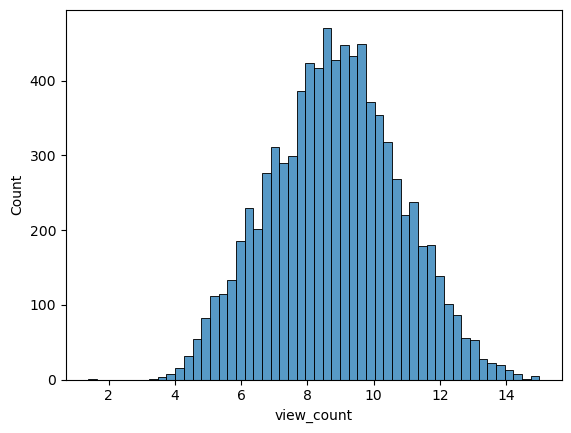

c:\Users\mms\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


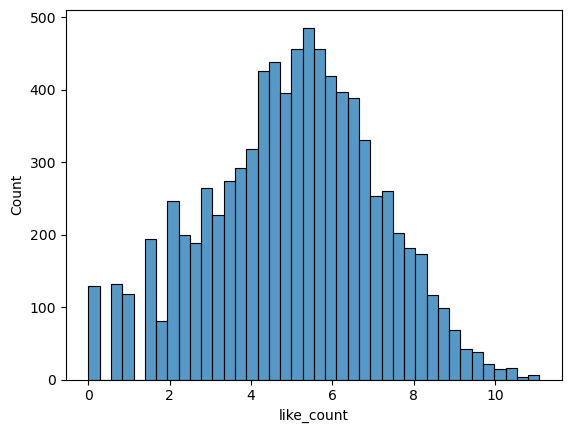

c:\Users\mms\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


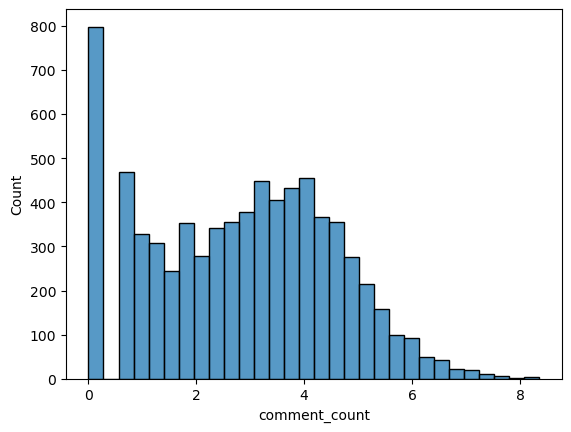

In [56]:
# scale the target data by getting the logarithim values of the views, for better visualisation
column_list = ['view_count', 'like_count', 'comment_count']
for column in column_list:
    log_data = np.log(df[column])
    sns.histplot(data=log_data)
    plt.show()

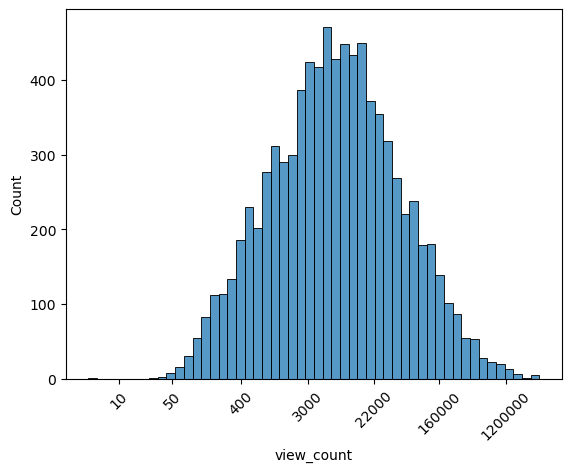

In [48]:
# convert view count back to the exponentiation values (original scale)

log_data = np.log(df['view_count'])
sns.histplot(data=log_data)
# Customize the x-axis ticks
custom_ticks = [10, 50, 400, 3000, 22000, 160000, 1200000]  # Convert log scale to original scale
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

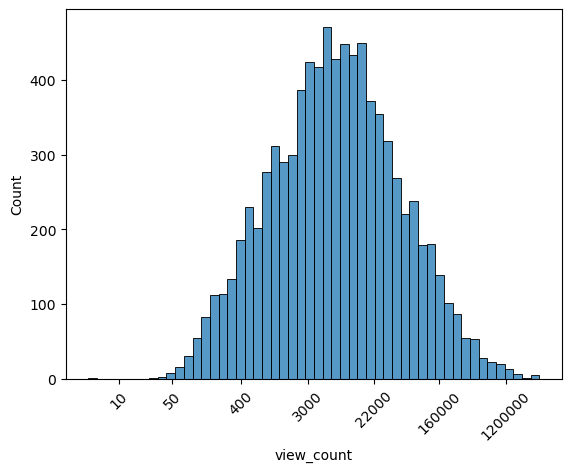

In [66]:
# convert view count back to the exponentiation values (original scale)

log_data = np.log(df['view_count'])
sns.histplot(data=log_data)
# Customize the x-axis ticks
custom_ticks = [10, 50, 400, 3000, 22000, 160000, 1200000]  # Convert log scale to original scale
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

c:\Users\mms\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


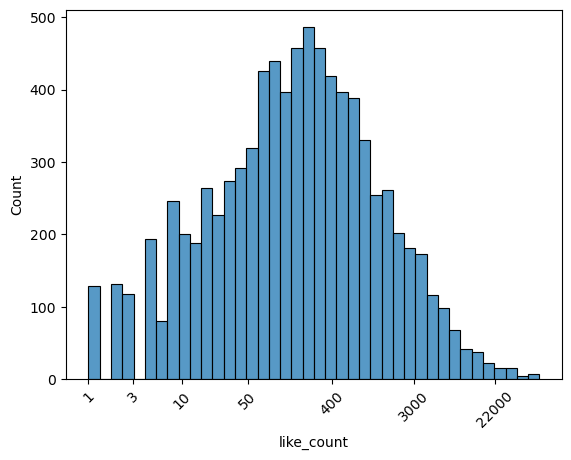

In [65]:
# convert like count back to the exponentiation values (original scale)

log_data = np.log(df['like_count'])
sns.histplot(data=log_data)
# Customize the x-axis ticks
custom_ticks = [1, 3, 10, 50, 400, 3000, 22000]
exp_ticks = np.exp(plt.xticks()[0])
# Convert log scale to original scale
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

c:\Users\mms\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


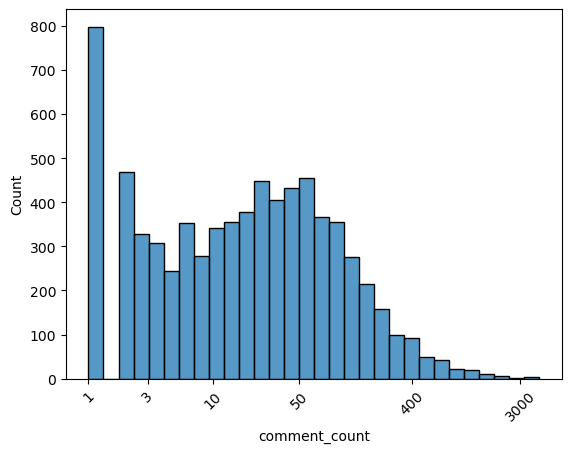

In [68]:
# convert comment count back to the exponentiation values (original scale)

log_data = np.log(df['comment_count'])
sns.histplot(data=log_data)
# Customize the x-axis ticks
custom_ticks = [1, 3, 10, 50, 400, 3000]
exp_ticks = np.exp(plt.xticks()[0])
# Convert log scale to original scale
plt.xticks(np.log(custom_ticks), custom_ticks, rotation=45)

plt.show()

In [53]:
df.describe().columns

Index(['view_count', 'like_count', 'comment_count', 'subscribers',
       'total_views', 'total_videos', 'duration_formatted', 'no_of_tags',
       'title_length', 'description_length'],
      dtype='object')

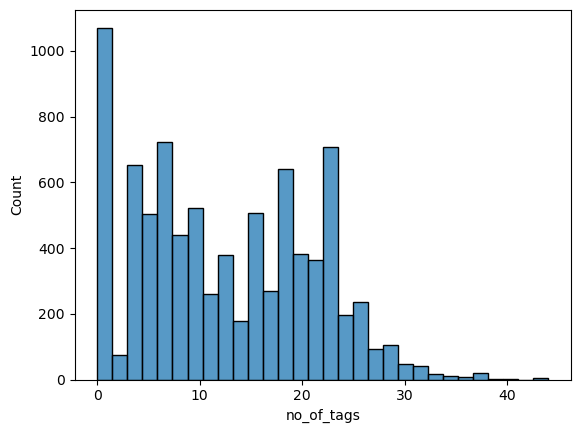

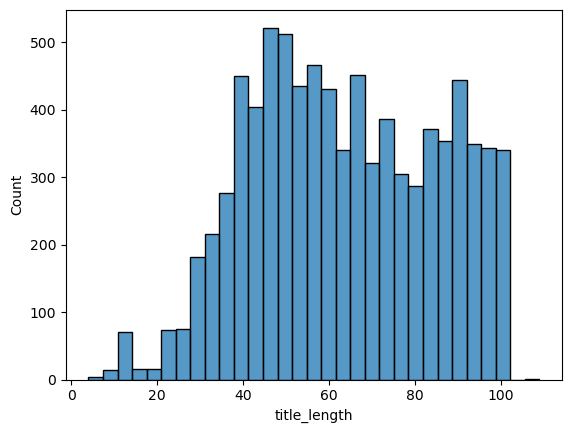

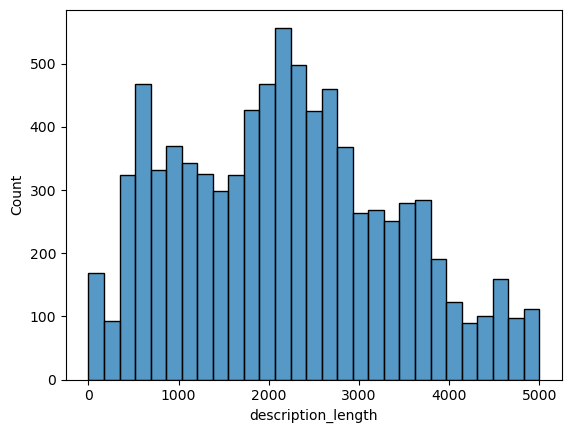

In [55]:
# duration needs to be formatte to minutes for distribution visuals
columns_list = ['no_of_tags', 'title_length', 'description_length']
for column in columns_list:
    sns.histplot(data=df[column])
    plt.show()

In [ ]:
'''DURATION COLUMN'''

#### Categorical Columns

In [69]:
df.describe().columns

Index(['view_count', 'like_count', 'comment_count', 'subscribers',
       'total_views', 'total_videos', 'duration_formatted', 'no_of_tags',
       'title_length', 'description_length'],
      dtype='object')

In [70]:
## convert boolean to binary columns or bar graph
## 
df.head()

,video_id,channel_id,title,description,tags,caption,licensed_content,view_count,like_count,comment_count,channel_name,subscribers,total_views,total_videos,playlist_id,category,duration_formatted,published_at_formatted,no_of_tags,title_length,description_length
0,3fqTNzXY5tg,UCvZnwzmc3m1Eush-Or8Z6DA,Using Code and GPT-3 to Learn Faster,Thanks to ProjectPro.io for their support: htt...,[],True,True,6871,184,23,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:18:06,2023-02-19 14:00:02,0,36,795
1,bgVu5WVR9SE,UCvZnwzmc3m1Eush-Or8Z6DA,Data Analyst MENTORSHIP - Q&A (while I drink ...,⬇️⬇️⬇️Check here prior to asking your question...,[],True,True,3723,184,9,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:29:22,2022-11-04 03:32:38,0,53,1475
2,4we3smhjAB8,UCvZnwzmc3m1Eush-Or8Z6DA,How Data Science ACTUALLY Works,Check out Deepnote for the easiest way to prac...,[],True,True,85152,2647,136,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:26:50,2022-11-01 16:30:09,0,31,1205
3,lpF5SSgczeE,UCvZnwzmc3m1Eush-Or8Z6DA,Does Instagram think you live in an influentia...,Request this and many other datasets @: https:...,[],True,True,4470,158,12,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 01:24:08,2022-10-25 14:00:07,0,81,1059
4,cRVM-LTe3fI,UCvZnwzmc3m1Eush-Or8Z6DA,Data Analyst MENTORSHIP - Q&A (while I drink ...,⬇️⬇️⬇️Check here prior to asking your question...,[],True,True,3078,104,4,Shashank Kalanithi,140000,6562136,152,UUvZnwzmc3m1Eush-Or8Z6DA,Education,0 days 00:26:55,2022-10-07 03:36:26,0,53,1475
